<a href="https://colab.research.google.com/github/sravani433/transaction_analysis/blob/main/transac_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

patterns = {
    'NEFT': r'NEFT/([A-Za-z0-9\s]+)/([A-Za-z0-9\s]+)/([a-zA-Z0-9\s]+)',
    'ECOM': r'Ecom/([A-Za-z0-9*\s]+)/([a-zA-Z0-9]+)/([a-zA-Z0-9]+)/',
    'NACH': r'NACH/([A-Za-z\s]+)/([\d]+)',
    'IFT': r'IFT/(\d+)/([A-Za-z\s.]+)/(\d+)(?:/([A-Za-z\s]+))?',
    'CARD': r'Payment towards card ending with ([A-Za-z0-9\s]+)',
    'POS': r'POS-VISA/([A-Za-z\s]+)/(\d+)/([A-Za-z]+)/(\d{2}:\d{2}:\d{2})',
    'IMPS-RIB': r'IMPS-RIB/Fund Trf/(\d+)/([A-Za-z\s]+)/([\dA-Z]+)/',
    'UPI-MOB': r'UPI/MOB/(\d+)/Payment from ([A-Za-z\s]+)',
    'ATM-NFS': r'ATM-NFS/CASH WITHDRAWAL/([A-Za-z]+)/(\d+)/([A-Za-z]+)',
    'IFT-OPT': r'IFT-OPT/IFT/(\d+)/(\d+)/(\d+)',
    'RTGS': r'RTGS/([A-Za-z0-9]+)/([A-Za-z\s0-9-]+)/([A-Z0-9a-z]+)',
    'IPO': r'IPO/([A-Za-z]+)/([A-Za-z0-9]+)/(\d+)',
    'INTEREST':r'MONTHLY SAVINGS INTEREST CREDIT'
}

# Sample narration list
narrations = [
    "NEFT/YESB30968164500/ZERODHA BROKING LIMITED NSE CLIENT/YESB0000001",
    "Ecom/50268317/RazorpayTP/LbwuD6OdpD/",
    "NACH/STEEL AUTHORIT/000000000000000000000000782693",
    "IFT/10031877550/ZERODHA BROKING LIMI/7827572/Zerodha",
    "Payment towards card ending with 428102******2511",
    "IFT/10094277560/Mr. TALACHUTLA VENKA/14973131",
    "MONTHLY SAVINGS INTEREST CREDIT",
    "IMPS-RIB/Fund Trf/312310219672/AVINASH DAS/5312334980KKBK/",
    "POS-VISA/OMNI RK/312614654128/VISHAKAPATNAM/14:48:24",
    "ATM-NFS/CASH WITHDRAWAL/NELLIMARL/314516021985/SEL",
    "UPI/MOB/316821933118/Payment from Airtel ThanksApp",
    "RTGS/IDFBR52023062200666790/Santosh Kumar Talachutla/DCBL0000197",
    "IFT-OPT/IFT/20233066780715/021123/2511",
    "RTGS/DEUTR52023110898806733/PRODIFY SOFTWARE SOLUTIONS LLP NO 446 13TH A/DEUT0784PBC",
    "IPO/TATATECH/OPTA1165617/30"
]

# Iterate through each narration
for narration in narrations:
    matched = False
    # Check for a match in each pattern
    for transaction_type, pattern in patterns.items():
        match = re.search(pattern, narration)
        if match:  # Check if the match is not None
            matched = True
            if transaction_type == 'NEFT':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_bank = match.group(3)
                transferror_type = "NEFT"

            elif transaction_type == 'ECOM':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_bank = match.group(3)
                transferror_type = "ECOM"

            elif transaction_type == 'NACH':
                transferror_name = match.group(1)
                transaction_id = match.group(2)
                transferror_bank = "Unknown"
                transferror_type = "NACH"

            elif transaction_type == 'IFT':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_bank = match.group(3)
                transferror_type = "IFT"

            elif transaction_type == 'CARD':
                transaction_id = match.group(1)
                transferror_name = "Unknown"
                transferror_bank = "Unknown"
                transferror_type = "CARD Payment"

            elif transaction_type == 'POS':
                transferror_name = match.group(1)
                transaction_id = match.group(2)
                location = match.group(3)
                time = match.group(4)
                transferror_bank = "Unknown"
                transferror_type = "POS"

            elif transaction_type == 'IMPS-RIB':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_bank = match.group(3)
                transferror_type = "IMPS-RIB"

            elif transaction_type == 'UPI-MOB':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_bank = "Unknown"
                transferror_type = "UPI-MOB"

            elif transaction_type == 'ATM-NFS':
                transferror_name = match.group(1)
                transaction_id = match.group(2)
                location = match.group(3)
                transferror_bank = "Unknown"
                transferror_type = "ATM-NFS Cash Withdrawal"

            elif transaction_type == 'IFT-OPT':
                transaction_id = match.group(1)
                transferror_name = "Unknown"
                transferror_bank = "Unknown"
                transferror_type = "IFT-OPT"

            elif transaction_type == 'RTGS':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_bank = match.group(3)
                transferror_type = "RTGS"

            elif transaction_type == 'IPO':
                transaction_id = match.group(2)
                transferror_name = match.group(1)
                transferror_bank = "Unknown"
                transferror_type = "IPO"
            elif transaction_type == 'INTEREST':
                transaction_id = "Unknown"
                transferror_name = "Unknown"
                transferror_bank = "Unknown"
                transferror_type = "Monthly saving interest credit"


            # Print extracted details
            print(f"Transaction Type: {transaction_type}")
            print(f"Transaction ID: {transaction_id}")
            print(f"Transferror Name: {transferror_name}")
            print(f"Transferror Bank: {transferror_bank}")
            print(f"Transferror Type: {transferror_type}")
            print("-" * 40)
            break  # Break out of pattern loop once a match is found

    if not matched:
        print(f"No match found for: {narration}")
        print("-" * 40)


Transaction Type: NEFT
Transaction ID: YESB30968164500
Transferror Name: ZERODHA BROKING LIMITED NSE CLIENT
Transferror Bank: YESB0000001
Transferror Type: NEFT
----------------------------------------
Transaction Type: ECOM
Transaction ID: 50268317
Transferror Name: RazorpayTP
Transferror Bank: LbwuD6OdpD
Transferror Type: ECOM
----------------------------------------
Transaction Type: NACH
Transaction ID: 000000000000000000000000782693
Transferror Name: STEEL AUTHORIT
Transferror Bank: Unknown
Transferror Type: NACH
----------------------------------------
Transaction Type: IFT
Transaction ID: 10031877550
Transferror Name: ZERODHA BROKING LIMI
Transferror Bank: 7827572
Transferror Type: IFT
----------------------------------------
Transaction Type: CARD
Transaction ID: 428102
Transferror Name: Unknown
Transferror Bank: Unknown
Transferror Type: CARD Payment
----------------------------------------
Transaction Type: IFT
Transaction ID: 10094277560
Transferror Name: Mr. TALACHUTLA VENK

In [ ]:
import pandas as pd

# Load the Excel file
excel_file = 'transaction 1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file, engine='openpyxl')

# Define the output CSV file name
csv_file = 'transaction.csv'

# Convert the DataFrame to a CSV file
df.to_csv(csv_file, index=False)
df.head()


,Tran Date,Chq No,Particulars,Debit,Credit,Balance
0,2022-04-02,NaN,UPI/P2M/209165170214/Xpressbee/ICICI Ban/Payment,292.00,NaN,2696681.65
1,2022-04-02,NaN,UPI/P2M/209111465173/AMAZON SE/HDFC\nBANK/Payment,179.00,NaN,2696502.65
2,2022-04-02,NaN,UPI/P2M/209165536202/THE NUTZ/Paytm\nPay/Payment,80.00,NaN,2696422.65
3,2022-04-02,NaN,UPI/P2M/209185793011/SARVANI H/Paytm\nPay/Payment,690.00,NaN,2695732.65
4,2022-04-02,NaN,POS/CENTRAL/VISAKHAPATNAM/010422/16\n:57,1124.61,NaN,2694608.04


In [ ]:
pip install pandas numpy scikit-learn openpyxl matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Total Transactions per Bank:
Transferror_Bank
Paytm\nPay     278
Paytm Pay      187
Unknown        145
Yes Bank\n     135
State\nBan     103
Federal\nB      82
Yes Bank        73
HDFC\nBANK      54
Axis Bank       51
ICICI Ban       48
ICICI\nBan      45
Yes\nBank       34
YesBank_Y       22
Bank of\nB      17
Axis\nBank      16
Andhra\nPr      15
Union\nBan      14
HDFC BANK       14
Indian\nBa      11
Indian\nOv       8
State Ban        5
Bank of\nI       5
Chaitanya        4
INDUSIND         4
YesBank_\nY      4
Kotak\nMah       4
DEUTSCHE         3
Indian Ba        3
ICICIBAN         3
IDFC\nFIRS       3
INDUSIND\n       2
Andhra\nBa       2
Punjab\nNa       2
Federal B        2
Karur\nVys       2
UCO\nBank        2
Canara\nBa       2
Bandhan B        1
Bank of\nM       1
Karnataka        1
Airtel Pa        1
IDBI\nBank       1
Name: count, dtype: int64

Total Amount Transferred per Bank:
Transferror_Bank
Airtel Pa         -150.00
Andhra\nBa       -1100.00
Andhra\nPr      -26270.00

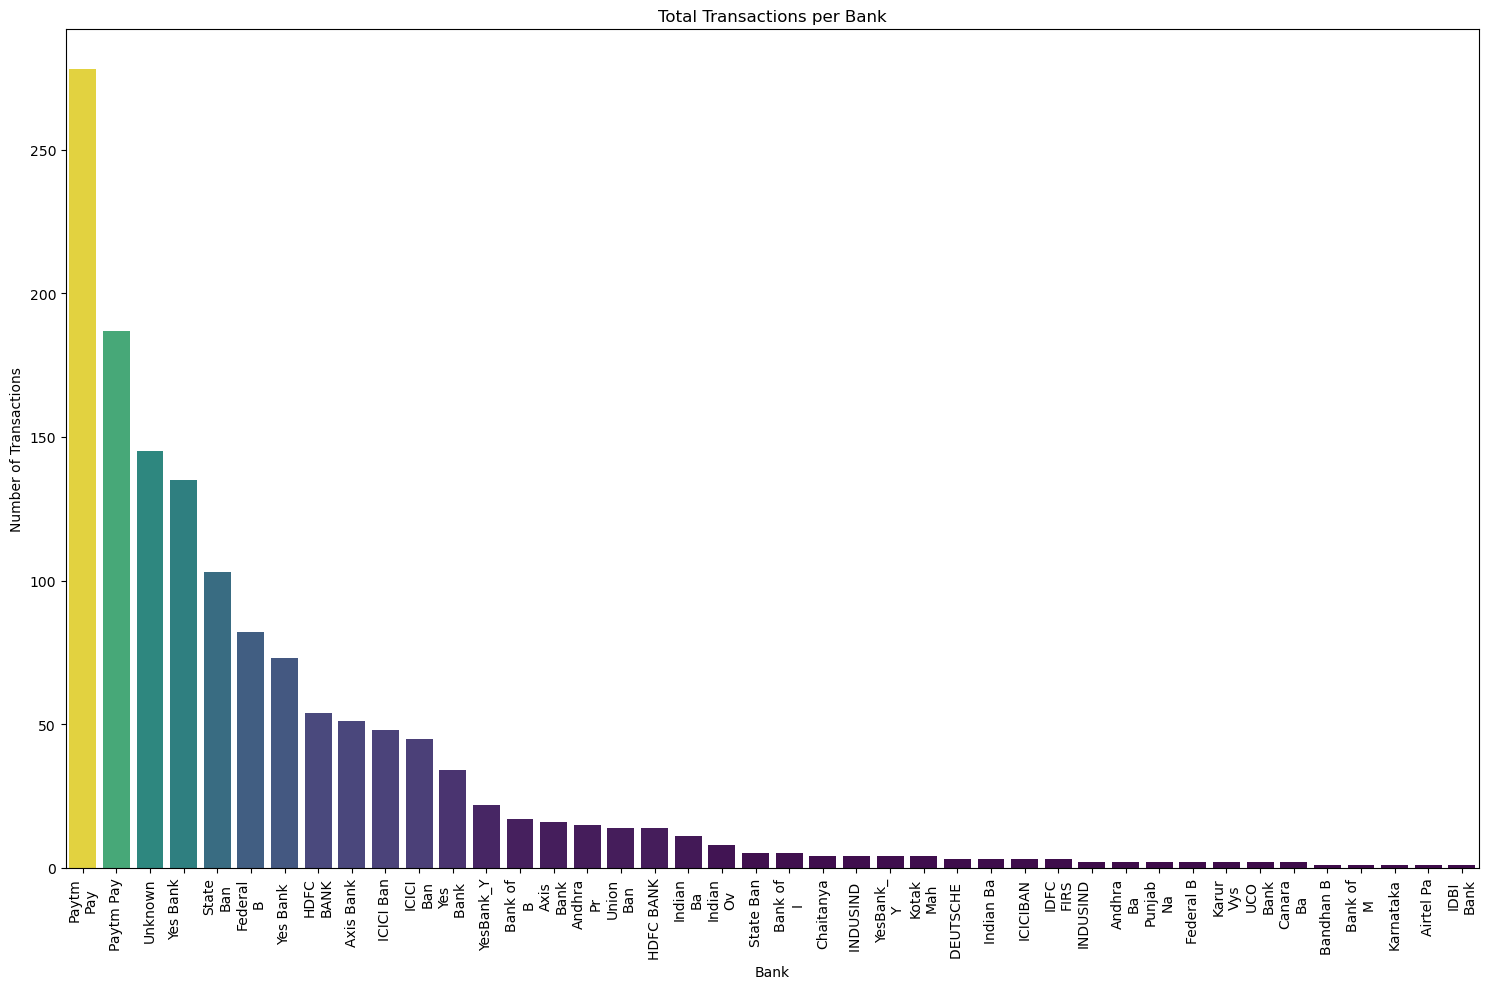

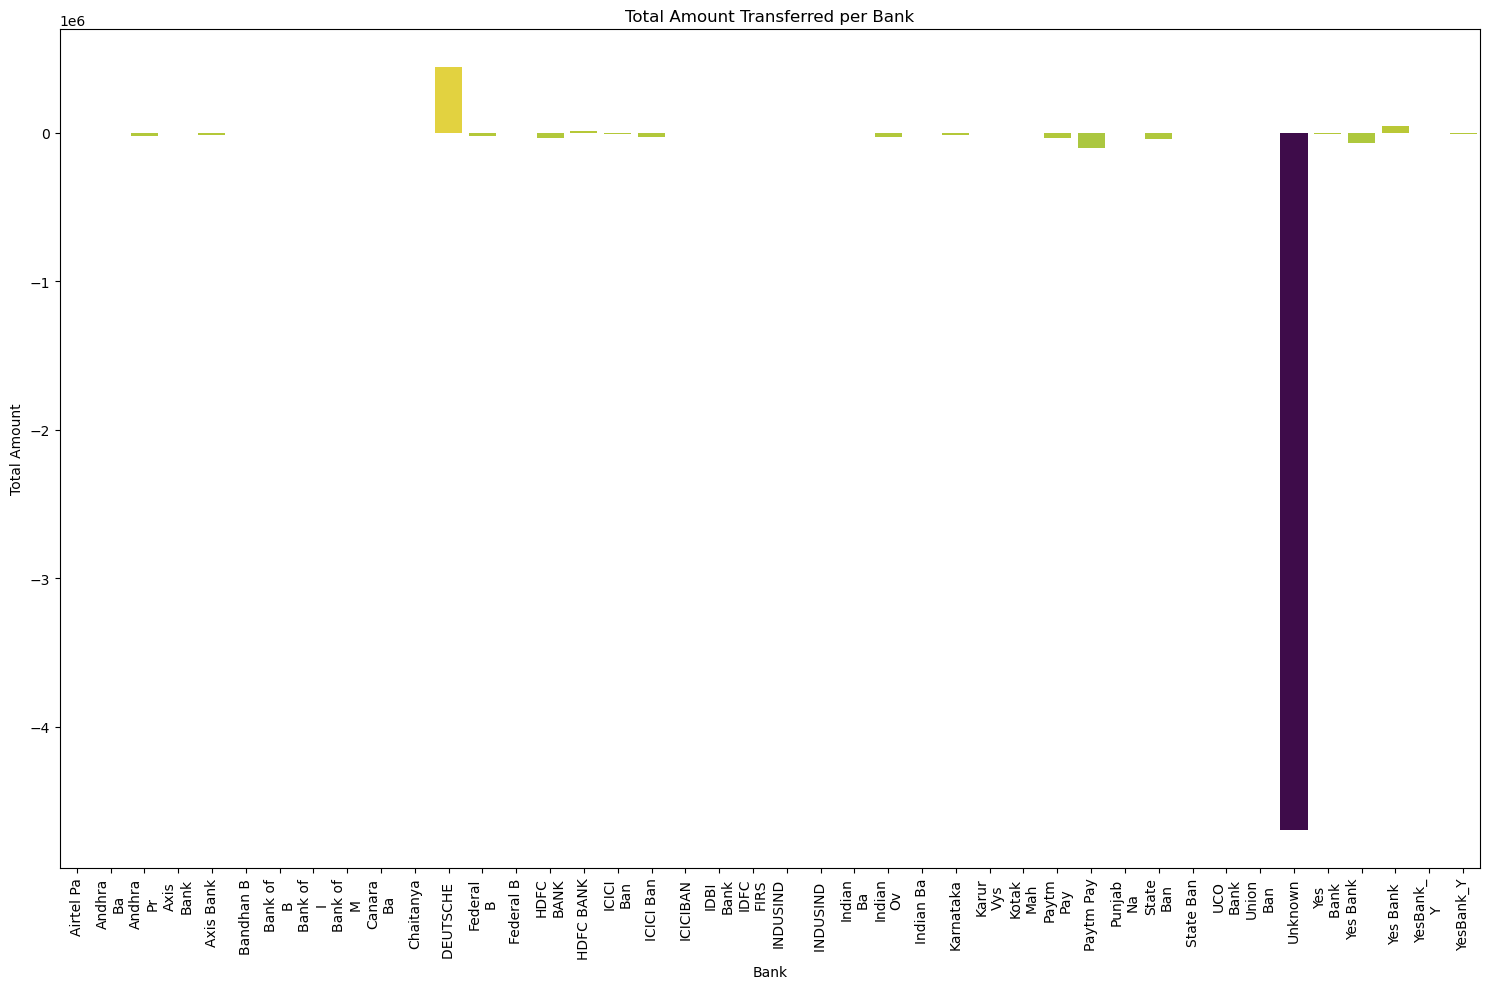

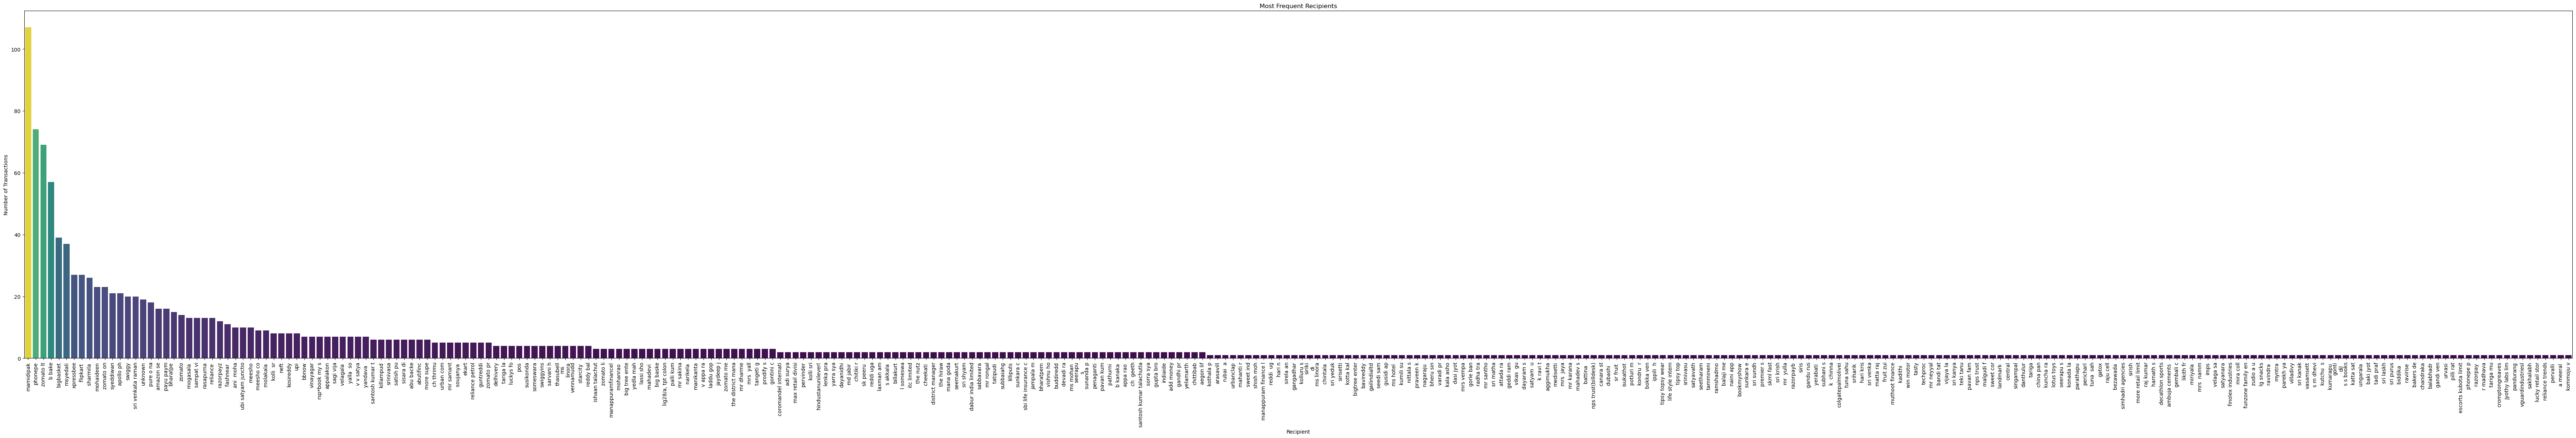

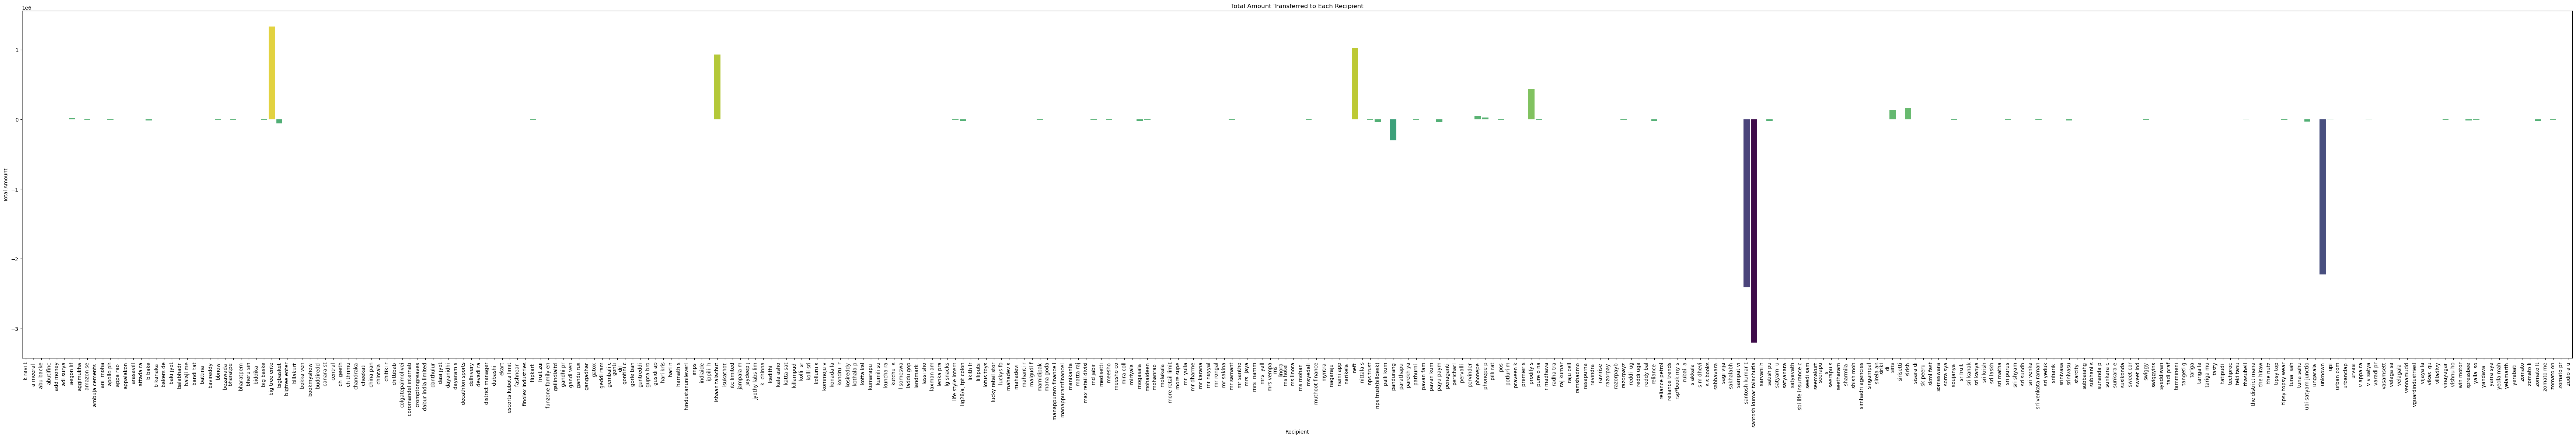

Accuracy: 0.9219858156028369
Classification Report:
                           precision    recall  f1-score   support

                  ARH-CR       0.00      0.00      0.00         7
                ATM-CASH       0.80      1.00      0.89         4
 By UPI-Person 2 Account       0.97      0.87      0.91        99
By UPI-Person 2 Merchant       0.91      1.00      0.95       284
                    ECOM       1.00      0.60      0.75         5
                    IMPS       0.00      0.00      0.00         1
                INB-BULK       0.00      0.00      0.00         1
                MOB-TPFT       1.00      1.00      1.00         1
                     POS       1.00      0.75      0.86        12
    Payment through card       0.00      0.00      0.00         1
                Transfer       1.00      0.50      0.67         4
                 Unknown       0.33      0.25      0.29         4

                accuracy                           0.92       423
               macro 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import openpyxl
import matplotlib.pyplot as plt
import re
import seaborn as sns
from pandas import ExcelWriter
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os


# loading the csv file
df = pd.read_csv('transaction.csv')

# Regex patterns
patterns = {
    'ATM-CASH': r'ATM-CASH/([A-Za-z0-9\s\/\,]+)/([A-Za-z]+)+/(\d{6})',
    'POS': r'POS/([A-Za-z\s]+)/([A-Za-z]+)/(\d{6})/',
    'UPI-P2A': r'UPI/P2A/(\d+)/([A-Za-z\s_]+)/([A-Za-z\s_]+)/',
    'UPI-P2M': r'UPI/P2M/(\d+)/([A-Za-z\s_]+)/([A-Za-z\s_]+)/',
    'UPI-CR': r'UPI/CRADJ/(\d+)/',
    'IMPS': r'IMPS/[A-Z0-9]+/(\d+)/([A-Za-z0-9]+)/([A-Za-z0-9]+)/',
    'ECOM': r'ECOM\sPUR/([A-Za-z0-9*\s]+)/([a-zA-Z0-9]+)/\d{6}/',
    'NBSM': r'NBSM/(\d+)/([A-Za-z0-9\s()]+)',
    'INB-IFT' : r'INB/IFT/([A-Za-z0-9\s]+)/([A-Za-z0-9\s]+)',
    'MOB-TPFT': r'MOB/TPFT/([A-Za-z0-9\s]+)/([A-Za-z0-9\s\d]+)',
    'ACH-CR': r'ACH-CR-([A-Za-z\s\(\(\.]+)-NACH-\s*((\d+)(?:\s*-\s*(\d+))?)',
    'NEFT': r'NEFT/([A-Za-z0-9\s]+)/([A-Za-z0-9\s]+)/([a-zA-Z0-9\s]+)/',
    'INB-BULK': r'INB-BULK- UPLD/([a-zA-Z0-9\s]+)/([a-zA-Z0-9]+)/([a-zA-Z]+)/([a-zA-Z0-9]+)/([a-zA-Z0-9]+)',
    'Locker': r'Locker Rent Recovery For([A-Za-z0-9\s-]+)',
    'CASH-WDL': r'SAK/CASH WDL/([a-zA-Z0-9\s]+)/\d+/([a-zA-Z0-9]+)/([a-zA-Z0-9]+)',
    'CARD':r'BRN-PYMT-CARD-(\d+)',
    'labs':r'([a-zA-Z0-9\s-]+)/',
    'int':r'(\d+):(a-zA-Z0-9)'
}

# Lists to store extracted values
transferror_id_list = []
transferror_name_list = []
transferror_bank_list = []
category_list = []
transferror_type_list = []

# Extracted details based on patterns
for index, row in df.iterrows():
    narration = row['Particulars']  # Column with transaction narrations
    matched = False
    for transaction_type, pattern in patterns.items():
        match = re.search(pattern, narration)
        if match:
            matched = True
            if transaction_type == 'ATM-CASH':
                transaction_id = match.group(2)
                transferror_name = match.group(1)
                transferror_type = "ATM-CASH"
                transferror_bank = "Unknown"
                category ="Unknown"
            elif transaction_type == 'POS':
                transaction_id = match.group(2)
                transferror_name = match.group(1)
                transferror_type = "POS"
                transferror_bank = "Unknown"
                category = "POS"
            elif transaction_type == 'UPI-P2A':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_type = "By UPI-Person 2 Account"
                transferror_bank = match.group(3)
                category = "Unknown"
            elif transaction_type == 'UPI-P2M':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_type = "By UPI-Person 2 Merchant"
                transferror_bank = match.group(3)
                category = "Unknown"
            elif transaction_type == 'IMPS':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_type = "IMPS"
                transferror_bank = match.group(3)
                category = "Unknown"
            elif transaction_type == 'ECOM':
                transaction_id = match.group(2)
                transferror_name = match.group(1)
                transferror_type = "ECOM"
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'NBSM':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_type = "NBSM"
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'INB-IFT':
                transaction_id = "Unknown"
                transferror_name = match.group(1)
                transferror_type = "INB-IFT"
                transferror_bank = "Unknown"
                category = match.group(2)
            elif transaction_type == 'MOB-TPFT':
                transaction_id = match.group(2)
                transferror_name = match.group(1)
                transferror_type = "MOB-TPFT"
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'ACH-CR':
                transaction_id = match.group(2)
                transferror_name = match.group(1)
                transferror_type = "ARH-CR"
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'NEFT':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_type = "NEFT"
                transferror_bank = match.group(3)
                category = "Unknown"
            elif transaction_type == 'INB-BULK':
                transaction_id = match.group(1)
                transferror_name = match.group(5)
                transferror_type = "INB-BULK"
                transferror_bank = "Unknown"
                category = match.group(2)
            elif transaction_type == 'CASH-WDL':
                transaction_id = match.group(1)
                transferror_name = match.group(2)
                transferror_type = "Cash withdrawl"
                transferror_bank = "Unknown"
                category = match.group(3)
            elif transaction_type == 'Locker':
                transaction_id = "Unknown"
                transferror_name = "Unknown"
                transferror_type = "Locker rent recovery"
                transferror_bank = "Unknown"
                category = match.group(1)
            elif transaction_type == 'labs':
                transaction_id = "Unknown"
                transferror_name = match.group(1)
                transferror_type = "Transfer"
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'CARD':
                transaction_id = match.group(1)
                transferror_name = "Unknown"
                transferror_type = "Payment through card"
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'int':
                transaction_id = match.group(1)
                transferror_name = "Unknown"
                transferror_type = "Int.Pd."
                transferror_bank = "Unknown"
                category = "Unknown"
            elif transaction_type == 'UPI-CR':
                transaction_id = match.group(1)
                transferror_name = "Unknown"
                transferror_type = "UPI-CRADJ"
                transferror_bank = "Unknown"
                category = "Unknown"

            transferror_id_list.append(transaction_id)
            transferror_name_list.append(transferror_name)
            transferror_bank_list.append(transferror_bank)
            transferror_type_list.append(transferror_type)
            category_list.append(category)
            break
    if not matched:
        transferror_id_list.append("Unknown")
        transferror_name_list.append("Unknown")
        transferror_bank_list.append("Unknown")
        transferror_type_list.append("Unknown")
        category_list.append("Unknown")

# Add new columns to the dataframe
df['Amount'] = df['Credit'].fillna(0) - df['Debit'].fillna(0)
df['Transferror_ID'] = transferror_id_list
df['Transferror_Name'] = transferror_name_list
df['Transferror_Bank'] = transferror_bank_list
df['Category'] = category_list
df['Transferror_Type'] = transferror_type_list

# Total transactions per bank
transactions_per_bank = df.groupby("Transferror_Bank").size().reset_index(name='Total Transactions')

# Group by Transferor Name (T.T) and Transferor Bank (T.B), and calculate the count of each combination
grouped_df = df.groupby(['Transferror_Name', 'Transferror_Bank']).size().reset_index(name='Transaction_Count')

categories = {
    'Food': {
        'Online Delivery': ['zomato', 'swiggy'],
        'Bakery': ['bakers de', 'b bake', 'dayaRam s', 'china Pan', 'fruit zui','the nutz', 'laddu go', 'lg snacks', 'lassi', 'mamidipak','sr fruit', 'sweet ind', 'skml fast', 'sweet cor', 'manikanta','gatox', 'rasapurna' ]
            },
    'Entertainment': {
        'Events': ['bookmy', 'funzone family', 'aon']
            },
    'Shopping': {
        'Clothing': ['meesho', 'amazon', 'flipkart', 'tipsy top', 'myntra', 'lucky', 'the hiraw', 'zudio', 'fashnear', 'max', 'life style', 'lilliputs'],
        'Groceries': ['big', 'reliance', 'more'],
        'Others': ['decathlon']
           },
    'Industry': {
        'Agriculture/Fertilizers': ['coromandel'],
        'Electrical/Engineering': ['crompton', 'vguard', 'win motor'],
        'Manufacturing/Plastics': ['finolex industries'],
        'Machinery/Agriculture': ['escorts kubota'],
        'Manufacturing': ['itc', 'vishnu ho'],
    },
    'Consumer Goods': {
        'Personal Care': ['colgate', 'dabur', 'jyothy labs', 'hindustan'],

    },
    'Retail/Shopping': {
        'Retail Chains': ['simhadri agencies'],

    },
    'Technology': {
        'Software Services': ['prodify s'],
    },
    'Services': {
        'Home/Professional': ['urban clap'],
        'General Services': ['thasubell']
    },
    'Finance': {
        'Finance': ['abutifinc', 'bharatpe', 'canarast', 'muthoot', 'manappuram', 'nps'],
        'Payment Gateway': ['razorpay','neft'],
        'Insurance/Investment': ['indiaide','aegon']
    },
    'Other expenses': {
        'Books': ['s s books'],
        'Fuel': ['reliance petrol'],
        'Construction': ['ambuja cements'],
        'toys':['lotus toys'],
        'agriculture':['pavan farms']
    },
    'Logistics': {
        '': ['delhivery', 'ekart', 'xpressbee']
    },
    'Hospital': {
        '': ['apollo ph']
    },
}


# Function to categorize transactions based on transferor name
def categorize_transaction(transferor_name):
    transferor_name = transferor_name.lower()  # Convert transferor name to lowercase
    for category, sub_categories in categories.items():
        for sub_category, names in sub_categories.items():
            if any(name in transferor_name for name in names):
                return f"{category}-{sub_category if sub_category else 'General'}"
    return 'Unknown'


# Apply categorization based on 'Transferor Name' column
df['Transferror_Name'] = df['Transferror_Name'].str.lower()  # Convert all transferor names to lowercase
df['Category'] = df['Transferror_Name'].apply(categorize_transaction)



# Prepare data for clustering
X = df[['Transferror_ID', 'Transferror_Name', 'Transferror_Bank', 'Category']]
X = pd.get_dummies(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Total transactions per bank
transactions_per_bank = df['Transferror_Bank'].value_counts()
print("Total Transactions per Bank:")
print(transactions_per_bank)

# Total amount transferred per bank
amount_per_bank = df.groupby('Transferror_Bank')['Amount'].sum()
print("\nTotal Amount Transferred per Bank:")
print(amount_per_bank)

# Most frequent recipients
transactions_per_recipient = df['Transferror_Name'].value_counts()
print("\nMost Frequent Recipients:")
print(transactions_per_recipient)

# Total amount transferred to each recipient
amount_per_recipient = df.groupby('Transferror_Name')['Amount'].sum()
print("\nTotal Amount Transferred to Each Recipient:")
print(amount_per_recipient)

# Advanced Insights
# 1. Plot transactions per bank
plt.figure(figsize=(15, 10))
sns.barplot(x=transactions_per_bank.index, y=transactions_per_bank.values, palette='viridis',legend=False, hue=transactions_per_bank)
plt.title('Total Transactions per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Plot total amount transferred per bank
plt.figure(figsize=(15, 10))
sns.barplot(x=amount_per_bank.index, y=amount_per_bank.values, palette='viridis',legend=False, hue=amount_per_bank)
plt.title('Total Amount Transferred per Bank')
plt.xlabel('Bank')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Plot most frequent recipients
plt.figure(figsize=(70, 12))
sns.barplot(x=transactions_per_recipient.index, y=transactions_per_recipient.values, palette='viridis',legend=False, hue = transactions_per_recipient)
plt.title('Most Frequent Recipients')
plt.xlabel('Recipient')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Plot total amount transferred to each recipient
plt.figure(figsize=(70, 12))
sns.barplot(x=amount_per_recipient.index, y=amount_per_recipient.values, palette='viridis',legend=False, hue=amount_per_recipient)
plt.title('Total Amount Transferred to Each Recipient')
plt.xlabel('Recipient')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


X = df[['Transferror_ID', 'Transferror_Name', 'Transferror_Bank', 'Category']]  # Features
y = df['Transferror_Type']  # Labels

# Handle missing values by replacing "Unknown" with NaN
X = X.replace("Unknown", np.nan)
X = X.ffill()  # Forward fill missing values

# Convert categorical variables to numeric
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred, zero_division=0)}")


# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))



# Add the predicted transferror type to the dataframe
df['Predicted_Transferror'] = model.predict(X)
output_path = 'D:\\expense\\Grouped_Transferor_Banks.xlsx'
df.to_excel(output_path, sheet_name='Grouped_Transferr', index=False)
print("Results saved")

In [ ]:
import pandas as pd
df = pd.read_excel('D:\\expense\\Grouped_Transferor_Bank.xlsx')
csv_file = 'transacc.csv'
df.to_csv(csv_file)
df.head(1400)

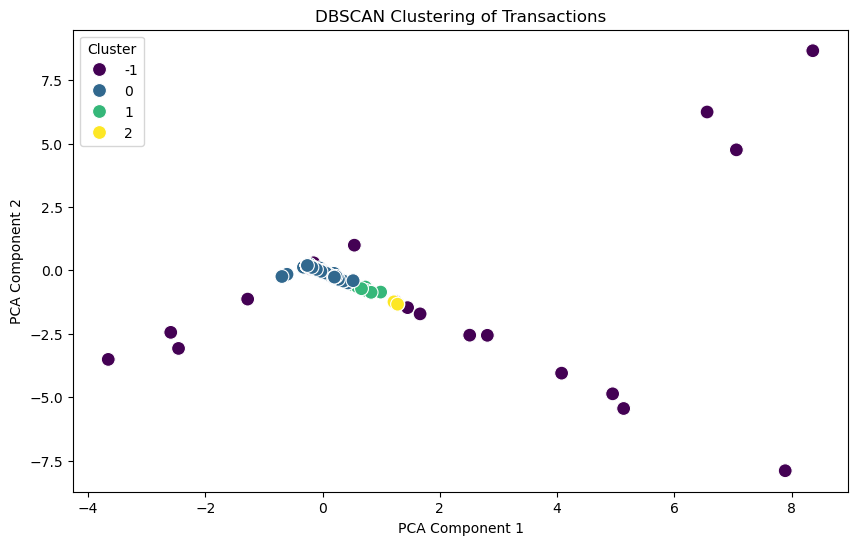

Table saved to D:\expense\category_subcategor.xlsx with bold main categories and DBSCAN clustering.


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from openpyxl import load_workbook
from openpyxl.styles import Font
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample dataframe structure assuming you've already extracted the transaction data with transferror_name and bank
df = pd.read_csv('transacc.csv')  # Replace with actual data

# Step 1: Group transactions by 'Category', 'Transferror_Name', and 'Transferror_Bank'
grouped_df = df.groupby(['Category', 'Transferror_Name', 'Transferror_Bank']).agg(
    Transaction_Count=('Particulars', 'count'),  # Counting transactions
    Total_Amount=('Amount', 'sum')               # Summing up the amount
).reset_index()

# Step 2: Standardize the features for clustering (Transaction Count, Total Amount)
X = grouped_df[['Transaction_Count', 'Total_Amount']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 3: Perform clustering using DBSCAN
grouped_df['Cluster'] = None  # Initialize cluster column with None

# Iterate through each main category to assign clusters independently
for category in grouped_df['Category'].unique():
    category_data = grouped_df[grouped_df['Category'] == category]  # Filter data for each category
    X_category = category_data[['Transaction_Count', 'Total_Amount']]  # Get features for clustering
    X_category_scaled = scaler.fit_transform(X_category)  # Standardize features
     # Applying DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust `eps` and `min_samples` as needed
    clusters = dbscan.fit_predict(X_category_scaled)

    # Assign clusters to the corresponding rows in the main DataFrame
    grouped_df.loc[grouped_df['Category'] == category, 'Cluster'] = clusters

# Step 4: Generate the table with transferror name, transferror bank, category, transaction count, cluster
category_table = []

for category in grouped_df['Category'].unique():
    # Create the main category row
    main_category = {
        'Category': category,
        'Transferror_Name': '',  # Main category doesn't have a transferror name
        'Transferror_Bank': '',  # Main category doesn't have a bank
        'Transaction_Count': grouped_df[grouped_df['Category'] == category]['Transaction_Count'].sum(),
        'Cluster': ''  # Main category doesn't get a cluster
    }

    category_table.append(main_category)

    # Add subcategory rows under the main category
    subcategory_rows = grouped_df[grouped_df['Category'] == category]
    for _, row in subcategory_rows.iterrows():
        sub_category = {
            'Category': f"  {row['Transferror_Name']}",  # Indent subcategory
            'Transferror_Name': row['Transferror_Name'],
            'Transferror_Bank': row['Transferror_Bank'],
            'Transaction_Count': row['Transaction_Count'],
            'Cluster': row['Cluster']
        }
        category_table.append(sub_category)

# Step 5: Convert to a DataFrame
category_df = pd.DataFrame(category_table)


# Step 6: Save to an Excel file with formatting
output_path = 'D:\\expense\\category_subcategor.xlsx'
category_df.to_excel(output_path, index=False)

# Step 7: Open the workbook and apply bold formatting to main categories
wb = load_workbook(output_path)
ws = wb.active

# Iterate through rows and apply bold formatting to main categories
for row in ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=1):  # Assuming categories are in the first column
    for cell in row:
        if cell.value and not cell.value.startswith('  '):
            cell.font = Font(bold=True)

# Save the changes
wb.save(output_path)
# Step 8: Visualize the clustering results using PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2D for plotting
X_pca = pca.fit_transform(X_scaled)


# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=grouped_df['Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering of Transactions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

print(f"Table saved to {output_path} with bold main categories and DBSCAN clustering.")




In [ ]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pillow opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 960.0 kB/s eta 0:00:41
   ---------------------------------------- 0.1/38.8 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.2/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.8 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.5/38.8 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/38.8 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.7/38.8 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.9/38.8 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.1/38.8 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.3/38.8 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.5/38.8 MB 2.9 MB/s eta 0:00:13
   - -------------------------------------- 1.7/38.8 MB 3.0 MB/s eta 0:00:13
   -

In [ ]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import cv2
import numpy as np

# Load the image
image_path = r'D:\expense\IMG_20240918_170756 (1).jpg'
img = Image.open(image_path)

# Step 1: Convert to grayscale
gray_img = img.convert('L')

# Step 2: Resize the image
gray_img = gray_img.resize((gray_img.width * 2, gray_img.height * 2))

# Step 3: Apply thresholding
# Convert the PIL image to a NumPy array for OpenCV processing
img_cv = np.array(gray_img)

# Apply thresholding using OpenCV
_, thresh_img = cv2.threshold(img_cv, 150, 255, cv2.THRESH_BINARY)

# Convert back to PIL format
thresh_img_pil = Image.fromarray(thresh_img)


thresh_img_pil.save('D:\\processed_image.jpg')

# Step 4: OCR on the preprocessed image
text = pytesseract.image_to_string(thresh_img_pil)

print("Extracted Text from the Image:")
print(text)


Extracted Text from the Image:
/9054/.

1 in
‘._£:......

 

 

; . .

/,,/g w

I " /5

vi, ,,
Q-€;”" :..,,f,‘ ~ ' 3"/, /'  _ _  / I -
 %/////////// ,«4/42;//,»;r/7/0/' 1

_ I

:   0/
“i 3?. 4 .‘ E  ‘

\\\\\§\\\§\§?\\‘N‘_~\\

¥i. ‘ ”""//J.» "'"""".'Lr' ’ -w  .,z, ., .
/ - V Ié   f//'/4’   I "/I , 

[I-I(«’,~.',’/ﬂ:f

BALARAMAYYA ass“: paggg
PLOT NO. : 90 sec 2 M.V.?, vs? » 1-;
PH . No. 9966336336, 9885’:l<457-08
email :baiaramayyabestprice@gmaii,wm

GST: 37AARFB9t;88L1Z8
FSSAI : 101200280003

1:-an-gun.-1

 

 
 

TAX INVOICE
Date: 09-17-2o2413:17

 

0

Bill No: 23253
HSN/SAC

   

 

item Description
MRP Rate Qtv

LALITHA RICE GREEN an zsxca
080.00 1560.00 1 5% 1560 to

UOM GST Arno mt

-I0-063090
Nos

1550.60-
1S60xLx

Items: 1.00

G ross Amt:
Total Amount:

——1—:‘21—nu—au 

. ONE THOUSAND FIVE HUNDRED S\XT‘( 9.0; EE
-_QI1LL...-...............——-———————
YOU HAVE SAVED on MRP as; 520

 

 

———p:——————-—:.q———

 

 
 
 

Including T ax S  __
......----«-----"""""“""" 0 (
'‘‘‘‘‘’ .. c

In [ ]:
import pytesseract
import re
import pandas as pd
from openpyxl import load_workbook
from collections import defaultdict
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

def extract_text_from_image(image_path):
    try:
        text = pytesseract.image_to_string(image_path)
        return text
    except PermissionError as e:
        print(f"Permission denied when accessing image file: {e}")
    except Exception as e:
        print(f"An error occurred while extracting text: {e}")

# Function to parse extracted text and generalize fields
def parse_invoice_text(text):
    parsed_data = defaultdict(str)

    try:

        date_match = re.search(r'Date:(\d{2}-\d{2}-\d{4})', text)
        parsed_data['Tran Date'] = date_match.group(1) if date_match else 'N/A'

        chq_no_match = re.search(r'Cheque No:\s(\d+)', text)
        parsed_data['Chq No'] = chq_no_match.group(1) if chq_no_match else 'N/A'

        amount_match = re.search(r'Amount:([\s]+)([0-9,.]+)', text)
        parsed_data['Amount'] = amount_match.group(2) if amount_match else 'N/A'

        transferror_id_match = re.search(r'Bill No:\s+([A-Za-z0-9\s]+)', text)
        parsed_data['Transferror_ID'] = transferror_id_match.group(1) if transferror_id_match else 'N/A'

        transferror_bank_match = re.search(r'Bank:\s([A-Za-z\s]+)', text)
        parsed_data['Transferror_Bank'] = transferror_bank_match.group(1) if transferror_bank_match else 'N/A'

        # Generalize particulars
        parsed_data['Particulars'] = "Generalized category based on invoice type"

        email_match = re.search(r'email\s:([A-Za-z0-9._%+-]+)\@([A-Za-z0-9.-]+)\.([A-ZA-Z]+)', text)
        parsed_data['Transferror_Name'] = email_match.group(1) if email_match else 'N/A'


    except Exception as e:
        print(f"Error occurred while parsing text: {e}")

    return parsed_data

# Function to append parsed data to an existing Excel sheet
def append_to_excel(parsed_data, excel_path):
    try:

        if not os.path.exists(excel_path):
            raise FileNotFoundError(f"The Excel file at {excel_path} does not exist.")

        wb = load_workbook(excel_path)
        sheet = wb.active

        # Find the last row to append data
        last_row = sheet.max_row + 1

        # Insert data into the specified columns
        sheet.cell(row=last_row, column=1).value = parsed_data['Tran Date']
        sheet.cell(row=last_row, column=2).value = parsed_data['Chq No']
        sheet.cell(row=last_row, column=3).value = parsed_data['Particulars']
        sheet.cell(row=last_row, column=7).value = parsed_data['Amount']
        sheet.cell(row=last_row, column=8).value = parsed_data['Transferror_ID']
        sheet.cell(row=last_row, column=10).value = parsed_data['Transferror_Bank']
        sheet.cell(row=last_row, column=11).value = parsed_data['Transferror_Type']
        # Save the workbook
        wb.save(excel_path)
        print(f"Data appended successfully to {excel_path}")

    except PermissionError as e:
        print(f"Permission denied when accessing Excel file: {e}")
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred while saving data to Excel: {e}")

# Paths to the image and Excel file
image_path = r'D:\expense\IMG_20240918_170756 (1).jpg'
excel_path = r'D:\expense\Grouped_Transferor_Banks.xlsx'

# Extract and process text from the image
extracted_text = extract_text_from_image(image_path)

if extracted_text:
    parsed_data = parse_invoice_text(extracted_text)
    append_to_excel(parsed_data, excel_path)


Data appended successfully to D:\expense\Grouped_Transferor_Banks.xlsx
